In [ ]:
#Performing Harris Corner Detection to idenitfy the key points on both the images separately.

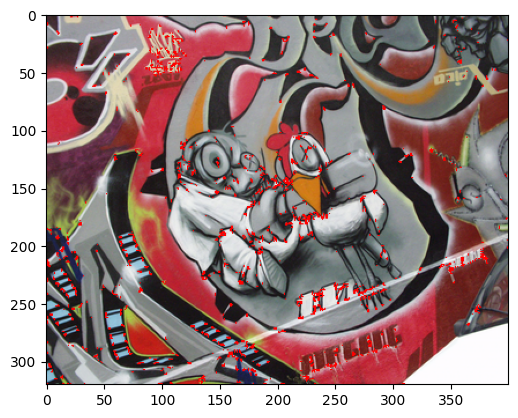

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img = cv2.imread("C:/Users/saiak/Downloads/img2.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris corner detection
gray = np.float32(gray)
corners = cv2.cornerHarris(gray, 2, 3, 0.04)

# Mark corners
img[corners > 0.01 * corners.max()] = [0, 0, 255]

# Display results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


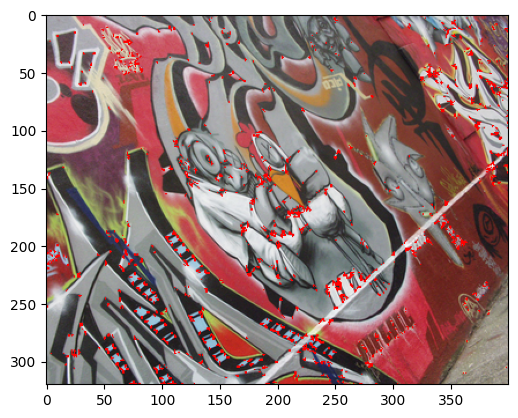

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img = cv2.imread("C:/Users/saiak/Downloads/img4.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris corner detection
gray = np.float32(gray)
corners = cv2.cornerHarris(gray, 2, 3, 0.04)

# Mark corners
img[corners > 0.01 * corners.max()] = [0, 0, 255]

# Display results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#Performing feature detection using SIFT on both the images separately.

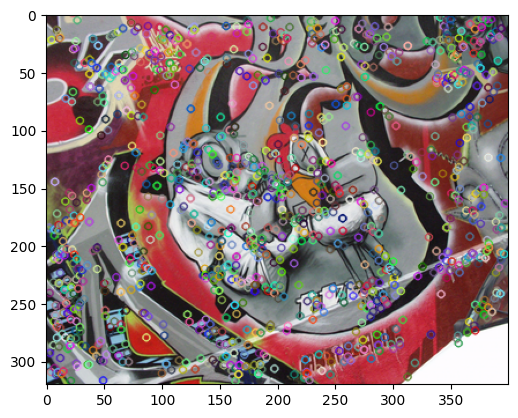

In [8]:
# Create SIFT detector
sift = cv2.SIFT_create()

img = cv2.imread('C:/Users/saiak/Downloads/img2.png')
if img is None:
    print("Error: Image not found or could not be loaded.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Display results
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()


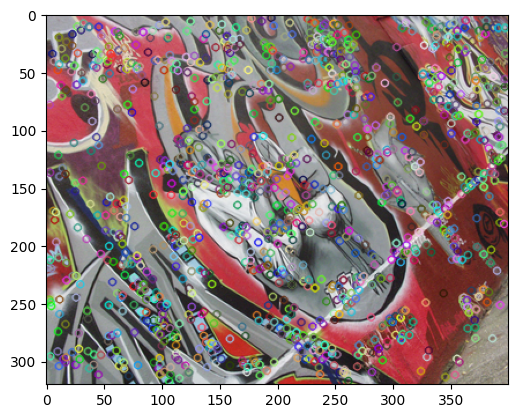

In [13]:
# Create SIFT detector
sift = cv2.SIFT_create()

img = cv2.imread('C:/Users/saiak/Downloads/img4.png')
if img is None:
    print("Error: Image not found or could not be loaded.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Display results
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
#Performing feature matching for both the images and displaying the no.of good matches.

Number of good matches: 143


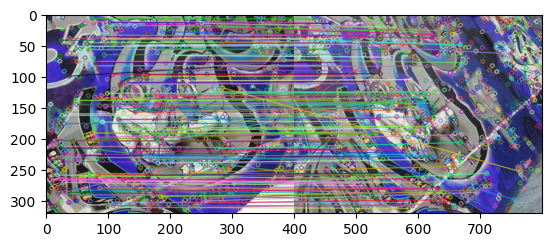

In [15]:
# Load both images
img1 = cv2.imread('C:/Users/saiak/Downloads/img2.png')
img2 = cv2.imread('C:/Users/saiak/Downloads/img4.png')

# Convert both images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Check if descriptors were found
if descriptors1 is None or descriptors2 is None:
    print("Error: Descriptors could not be computed for one or both images.")
else:
    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

    # Match descriptors between the two images
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:  # Ratio test
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None)

    # Display the number of good matches
    print(f"Number of good matches: {len(good_matches)}")

    # Display matches
    plt.imshow(img_matches)
    plt.show()

